In [1]:
import pandas as pd

In [30]:
df = pd.read_csv("ames/test.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [31]:
arr1 = df.columns.values
arr2 = df.columns.values

In [4]:
arr1 = pd.Series(df.columns.values).str.lower()
arr2 = pd.Series(df.columns.values).str.lower()

In [32]:
arr1

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [33]:
from similarity.normalized_levenshtein import NormalizedLevenshtein
normalized_levenshtein = NormalizedLevenshtein()

In [34]:
vectors = pd.DataFrame([[normalized_levenshtein.distance(i, j) for j in arr2] for i in arr1])
vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333,1.000000,0.923077
1,1.0,0.000000,0.800000,0.909091,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,...,1.000000,0.900000,0.900000,1.000000,0.909091,0.800000,0.700000,0.800000,0.900000,0.923077
2,1.0,0.800000,0.000000,0.727273,1.000000,0.875000,1.000000,1.000000,0.818182,0.888889,...,0.909091,1.000000,0.875000,0.875000,0.909091,0.875000,0.750000,0.875000,1.000000,0.769231
3,1.0,0.909091,0.727273,0.000000,0.545455,0.727273,1.000000,0.545455,0.636364,0.818182,...,1.000000,0.818182,0.818182,0.727273,0.818182,0.909091,0.818182,0.909091,0.909091,0.769231
4,1.0,0.900000,1.000000,0.545455,0.000000,0.714286,0.857143,0.625000,0.818182,0.888889,...,0.909091,0.375000,0.857143,0.857143,0.818182,1.000000,0.857143,1.000000,1.000000,0.923077


In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(vectors)
pc = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
pc.head()

,pc1,pc2
0,-0.093302,-0.437746
1,-0.069752,-0.191066
2,0.286697,-0.380828
3,0.423099,-0.221348
4,-0.046492,0.005565


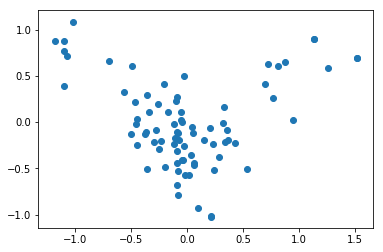

In [37]:
import matplotlib.pyplot as plt
plt.scatter(pc['pc1'], pc['pc2'])
plt.show()

In [38]:
from sklearn.cluster import KMeans
clusters = 4
kmeans = KMeans(n_clusters=clusters, random_state=0).fit(vectors)

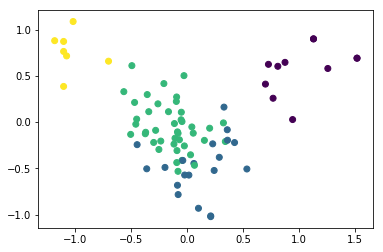

In [39]:
plt.scatter(pc['pc1'], pc['pc2'], c=kmeans.labels_)
plt.show()

In [40]:
import numpy as np

def dist(x, y): # computationally effcient euclidean distance
    dist = np.sqrt(np.dot(x, x) - 2 * np.dot(x, y) + np.dot(y, y))
    return np.around(dist, 3)

def mean_dist(DF, X):
    dists = DF.apply(dist, args=(X, ), axis=1)
    return dists.mean()

In [41]:
clustered = pd.DataFrame()
for i in range(clusters):
    clustered[i] = vectors.apply(dist, args=(kmeans.cluster_centers_[i], ), axis=0)
clustered = clustered.set_index(arr1)

In [42]:
clustered

,0,1,2,3
Id,1.993,1.435,1.353,2.110
MSSubClass,1.837,1.422,1.213,2.033
MSZoning,1.723,1.077,1.357,2.117
LotFrontage,1.617,1.254,1.317,2.206
LotArea,1.860,1.539,1.346,1.968
Street,1.729,1.348,1.090,1.587
Alley,1.888,1.515,1.080,1.782
LotShape,1.694,1.404,1.197,2.107
LandContour,1.808,1.069,1.282,1.968
Utilities,1.678,1.210,1.175,2.017


In [43]:
#kmeans.cluster_centers_

for i in range(clusters):
    print("Cluster " + str(i) + ":")
    distance = mean_dist(vectors[kmeans.labels_==i], kmeans.cluster_centers_[i])
    print("Mean Dist to Centroid: " 
          + str(np.around(distance, 3)))
    
    fields = pd.Series(arr1[kmeans.labels_==i])
    for field in fields:
        print(field, clustered.loc[field][i])
    print('\n')

Cluster 0:
Mean Dist to Centroid: 1.003
BsmtQual 1.131
BsmtCond 1.185
BsmtExposure 0.943
BsmtFinType1 0.974
BsmtFinSF1 0.824
BsmtFinType2 0.974
BsmtFinSF2 0.824
BsmtUnfSF 0.76
1stFlrSF 1.219
BsmtFullBath 1.069
BsmtHalfBath 1.134


Cluster 1:
Mean Dist to Centroid: 1.19
MSZoning 1.077
LotFrontage 1.254
LandContour 1.069
LotConfig 1.056
Neighborhood 1.126
Condition1 1.19
Condition2 1.196
OverallCond 1.28
Exterior1st 1.277
Exterior2nd 1.219
ExterCond 1.238
Foundation 1.206
Heating 1.267
HeatingQC 1.325
CentralAir 1.126
LowQualFinSF 1.214
Functional 1.073
MoSold 1.241
YrSold 1.291
SaleCondition 1.077


Cluster 2:
Mean Dist to Centroid: 1.255
Id 1.353
MSSubClass 1.213
LotArea 1.346
Street 1.09
Alley 1.08
LotShape 1.197
Utilities 1.175
LandSlope 1.28
BldgType 1.38
HouseStyle 1.214
OverallQual 1.391
YearBuilt 1.267
YearRemodAdd 1.186
RoofStyle 1.308
RoofMatl 1.269
MasVnrType 1.355
MasVnrArea 1.231
ExterQual 1.458
TotalBsmtSF 1.223
Electrical 1.224
2ndFlrSF 1.363
GrLivArea 1.302
FullBath 1.438

In [53]:
import json
import uuid

In [64]:
classifications_obj = {}
fields_obj = {}

for i in range(clusters):
    cluster = {}
    #distance = mean_dist(vectors[kmeans.labels_==i], kmeans.cluster_centers_[i])
    #print("Mean Dist to Centroid: " 
    #      + str(np.around(distance, 3)))
    
    fields = pd.Series(arr1[kmeans.labels_==i])
    for field_name in fields:
        field_id = "field-" + str(uuid.uuid4())
        
        cluster[field_id] = clustered.loc[field_name][i]
        fields_obj[field_id] = {"field_name" : field_name}
        
    classifications_obj["classification-" + str(uuid.uuid4())] = cluster

    

In [65]:
data = {}
data["Classifcations"] = classifications_obj
data["Fields"] = fields_obj


In [66]:
print(json.dumps(data, sort_keys=True, indent=4))

{
    "Classifcations": {
        "classification-7545344a-92c3-46ee-9c1c-aa50283425fe": {
            "field-228816d5-67d8-40ef-ab67-e120d39d2c66": 0.856,
            "field-32bc0bc2-2fc9-40ad-94a5-e0e97d67346a": 0.619,
            "field-68256c0d-5b0a-4deb-9514-abace0b16315": 0.81,
            "field-6ab5522e-2629-46a9-806f-5c29b2e79dcf": 0.944,
            "field-9ee87187-007e-4826-be0b-3667ecde752e": 0.534,
            "field-be993294-4d8f-440d-b9b8-b103e130f396": 0.881,
            "field-e0d844d7-7ecc-40a0-b3a4-5eca68a9aca3": 0.789
        },
        "classification-993652b1-0fd2-4f31-987f-08eee91a3ff7": {
            "field-0682408d-23eb-4ccf-9c85-71064956441a": 1.219,
            "field-180e70c5-1c5e-4e99-abbd-b9db34ffc49b": 0.824,
            "field-420a4731-9813-4420-a496-3ecd676ebbf3": 0.974,
            "field-44a2e28f-7a7a-487e-9d90-ed57255ab14f": 0.76,
            "field-68aa5547-82bb-462e-b20e-749f4a23404c": 1.131,
            "field-6b9ee714-b058-4acf-bf33-fd0e2c64edc3"

/Users/kylemaxwell/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


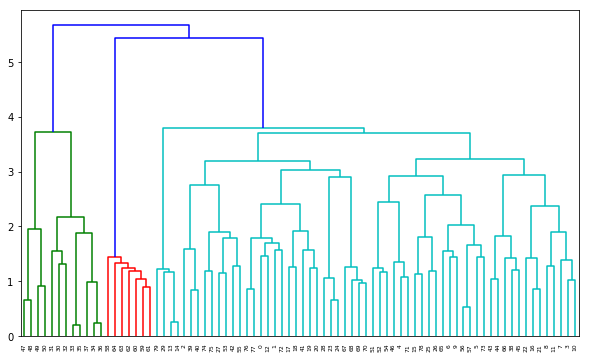

In [15]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 6)) 
dend = shc.dendrogram(shc.linkage(vectors, method='ward'))  #Ward variance minimization algorithm

In [16]:
from sklearn.cluster import AgglomerativeClustering

clusters = 5
agg = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=clusters,
            pooling_func='deprecated').fit(vectors)

/Users/kylemaxwell/anaconda3/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


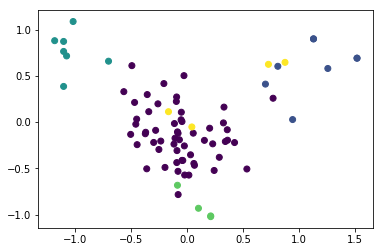

In [17]:
plt.scatter(pc['pc1'], pc['pc2'], c=agg.labels_)
plt.show()

In [18]:
for i in range(clusters):
    print("Cluster " + str(i) + ":")
    print(pd.Series(arr1[agg.labels_==i]))
    print('\n')

Cluster 0:
0                Id
1        MSSubClass
2          MSZoning
3       LotFrontage
4           LotArea
5            Street
6             Alley
7          LotShape
8       LandContour
9         Utilities
10        LotConfig
11        LandSlope
12     Neighborhood
13         BldgType
14       HouseStyle
15      OverallQual
16      OverallCond
17        YearBuilt
18     YearRemodAdd
19        RoofStyle
20         RoofMatl
21      Exterior1st
22      Exterior2nd
23       MasVnrType
24       MasVnrArea
25        ExterQual
26        ExterCond
27      TotalBsmtSF
28          Heating
29        HeatingQC
30       CentralAir
31       Electrical
32         1stFlrSF
33         2ndFlrSF
34     LowQualFinSF
35        GrLivArea
36     BedroomAbvGr
37     KitchenAbvGr
38      KitchenQual
39     TotRmsAbvGrd
40       Functional
41       Fireplaces
42      FireplaceQu
43       PavedDrive
44       WoodDeckSF
45      OpenPorchSF
46    EnclosedPorch
47        3SsnPorch
48      ScreenPorch
49       